# Машинное обучение, DS-поток
## Задание ML.3


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 60 баллов;
* Задача 2 &mdash; 60 баллов;
* Задача 3 &mdash; 120 баллов.

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Добавил графики метрик</font></b>

  * <b><font color="#00b565" size="3">Добавил стандартизацию для лог регрессии</font></b>

  * <b><font color="#00b565" size="3">Добавил правильный перебор параметра регуляризации</font></b>

  * <b><font color="#00b565" size="3">Добавил метрики для сетки</font></b>

  * <b><font color="#00b565" size="3">Добавил графики для двух критериев</font></b>

* <b><font size="4">Задача 2</font></b>
  * <b><font color="#00b565" size="3">Добавил скалирование</font></b>

  * <b><font color="#00b565" size="3">Добавил kde графики среднего качества </font></b>

* <b><font size="4">Задача 3</font></b>
  * <b><font color="#00b565" size="3">Исправил функцию абсолютных потерь</font></b>

  * <b><font color="#00b565" size="3">Исправил реализацию predict_proba</font></b>

In [315]:
# Bot check

# HW_ID: ds_ml4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

*Если у вас новая версия `sklearn` и импорт `load_boston` в ячейке ниже выдает ошибку, скачайте этот датасет так, как написано в тексте ошибки, или же воспользуйтесь альтернативным более объемным датасетом `fetch_california_housing`.*

In [316]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score
from sklearn.model_selection import (
    train_test_split,
    LeaveOneOut,
    LeavePOut,
    KFold,
    ShuffleSplit,
    GridSearchCV,
    StratifiedKFold,
    StratifiedShuffleSplit,
    LeaveOneGroupOut,
    LeavePGroupsOut,
    GroupKFold,
    GroupShuffleSplit,
    cross_val_score,
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_wine
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.utils import shuffle
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

# from sklearn.datasets import load_boston  # см. комментарий выше
load_boston = pd.read_csv("boston_house_prices.csv")
from ucimlrepo import fetch_ucirepo 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, palette="Set2")

**При возникновении затруднений, которые не получается решить самостоятельно за разумное время, спрашивайте вопросы в чате. Вам обязательно постараются помочь. Успехов с решением!**

---
### Задача 1

Рассмотрим датасет для классификации вина на три класса по 13 вещественным признакам. Датасет состоит из 178 объектов. В данной задаче, используя этот датасет, вы научитесь пользоваться кросс-валидацией и подбирать оптимальные гиперпараметры модели.

In [317]:
print(load_wine()["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

Загрузим сами данные

In [318]:
X, y = load_wine(return_X_y=True)
X.shape, y.shape

((178, 13), (178,))

Разобьём данные на обучающую и тестовую выборки.

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**1.** Используя одну из стратегий кросс-валидации подберите оптимальные параметры обучения решающего дерева &mdash; `max_depth` (от 1 до 14) и `min_samples_split`, а также оптимальный критерий (достаточно рассмотреть критерий Джини и энтропийный). В качестве метрик используйте Accuracy и F1 с микро и макро усреднением. В данной задаче можно пользоваться готовой реализацией дерева.

In [320]:
tree_gridsearch = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "max_depth": np.arange(1, 15),
        "min_samples_split": [2, 3, 5, 8, 10],
        "criterion": ["gini", "entropy"],
    },
)

In [321]:
def show_score_greadserch(model, X_train, y_train, X_test, y_test):
    print("Лучшие параметры:", model.best_params_)
    print(f"Лучшая точность на кросс-валидации: {model.best_score_:.3f}" )

    y_pred = model.best_estimator_.predict(X_test)
    print(f"Accuracy на тестовых данных: {accuracy_score(y_test, y_pred):.3f}" )
    print(f"F1-макро на тестовых данных: {f1_score(y_test, y_pred, average="macro"):.3f}")
    print(f"F1-микро на тестовых данных: {f1_score(y_test, y_pred, average="micro"):.3f}")

In [322]:
tree_gridsearch.fit(X_train, y_train)
show_score_greadserch(tree_gridsearch, X_train, y_train, X_test, y_test)

Лучшие параметры: {'criterion': 'gini', 'max_depth': np.int64(3), 'min_samples_split': 2}
Лучшая точность на кросс-валидации: 0.947
Accuracy на тестовых данных: 0.956
F1-макро на тестовых данных: 0.956
F1-микро на тестовых данных: 0.956


/home/alexander/.local/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Выведем оптимальные параметры.

In [323]:
print(tree_gridsearch.best_params_)

{'criterion': 'gini', 'max_depth': np.int64(3), 'min_samples_split': 2}


Постройте графики зависимости метрик от максимальной глубины дерева для каждого критерия на train и на test. Значение `min_samples_split` фиксируйте.

In [324]:
trees_history = {"depth": [], "accuracy": [], "f1_score": [], "f1_score_micro": []}

# Перебор глубин дерева
for depth in np.arange(1, 15):
    tree = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_split=tree_gridsearch.best_params_["min_samples_split"],
        criterion=tree_gridsearch.best_params_["criterion"],
    )

    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    f1_mi = f1_score(y_test, y_pred, average="micro")

    # Сохранение результатов
    trees_history["depth"].append(depth)
    trees_history["accuracy"].append(accuracy)
    trees_history["f1_score"].append(f1)
    trees_history["f1_score_micro"].append(f1_mi)


<b><font color="#00b565" size="5">Добавил графики метрик</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Нет графиков зависимости метрик от глубины дерева. Инд. комм. f1_score только macro



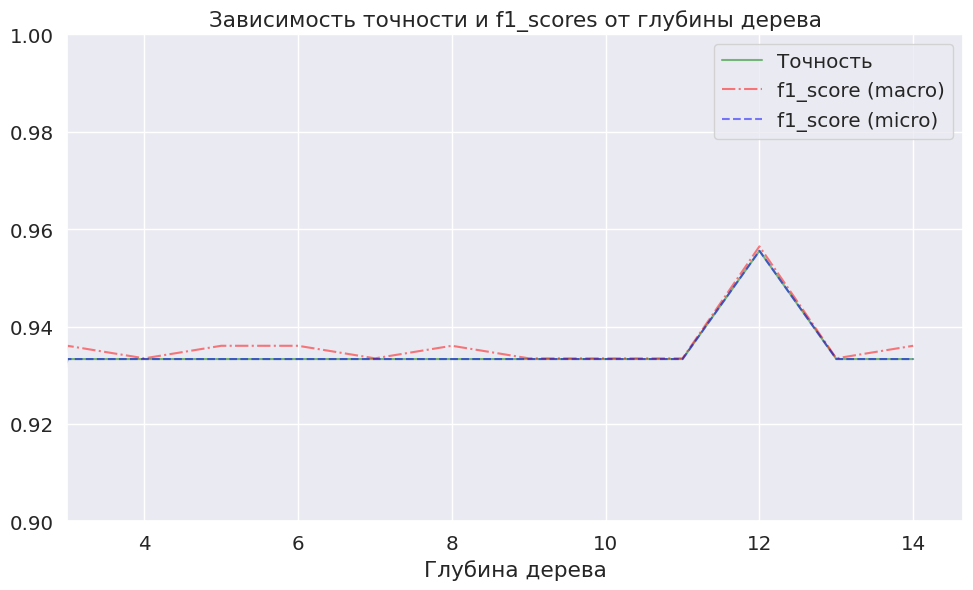

In [325]:
plt.figure(figsize=(10, 6))

# График точности
plt.plot(
    trees_history["depth"],
    trees_history["accuracy"],
    color="green",
    ls="-",
    label="Точность",
    alpha=0.5
)

# График f1_score (macro)
plt.plot(
    trees_history["depth"],
    trees_history["f1_score"],
    color="red",
    ls="dashdot",
    label="f1_score (macro)",
    alpha=0.5

)

# График f1_score (micro)
plt.plot(
    trees_history["depth"],
    trees_history["f1_score_micro"],
    color="blue",
    ls="--",
    label="f1_score (micro)",
    alpha=0.5

)

# Настройка графика
plt.xlabel("Глубина дерева")
plt.ylim((0.9, 1))
plt.xlim((3, None))
plt.tight_layout()
plt.legend()
plt.title("Зависимость точности и f1_scores от глубины дерева")
plt.show()

<b><font color="#00b565" size="5">Конец исправлений</font></b>


**2.** Подберите коэффициент регуляризации для логистической регрессии и постройте аналогичные графики. Какая из двух моделей лучше?

<b><font color="#00b565" size="5">Добавил правильный перебор параметра регуляризации</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Параметр регуляризации C перебран неподходящим образом (в linspace, либо захватывает мало значений около нуля). Комм. Параметры вроде коэфициента регуляризации лучше перебирать в logscale, чтобы захватить больше несущих смысл значений.

<b><font color="#00b565" size="5">Добавил метрики для сетки</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Поиск по сетке выполнен только для одной метрики




In [326]:
def custom_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def custom_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

mae_scorer = make_scorer(custom_mae, greater_is_better=False)
mse_scorer = make_scorer(custom_mse, greater_is_better=False)


linear_gridsearch = GridSearchCV(
    estimator=LogisticRegression(fit_intercept=True, max_iter=500),
    param_grid={"C": np.logspace(1e-6, 1e1, 20)},
    scoring={"MAE": mae_scorer, "MSE": mse_scorer, "Accuracy": "accuracy"},
    refit="Accuracy", 
)

<b><font color="#00b565" size="5">Конец исправлений</font></b>


<b><font color="#00b565" size="5">Добавил стандартизацию для лог регрессии</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Не проведена стандратизация при использовании логистической регресии или сделано это неправильно


In [327]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


linear_gridsearch.fit(X_train, y_train)
show_score_greadserch(linear_gridsearch, X_train, y_train, X_test, y_test)

Лучшие параметры: {'C': np.float64(11.288402173276179)}
Лучшая точность на кросс-валидации: 0.977
Accuracy на тестовых данных: 1.000
F1-макро на тестовых данных: 1.000
F1-микро на тестовых данных: 1.000


<b><font color="#00b565" size="5">Конец исправлений</font></b>


In [328]:
linear_regression_history = {"alpha": [], "accuracy": [], "f1_score": [], "f1_score_micro": []}

# Перебор значений alpha
for alpha in np.logspace(1e-6, 1e1, 20):
    lin_reg = LogisticRegression(fit_intercept=True, max_iter=500, C=alpha)

    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")

    # Сохранение результатов
    linear_regression_history["alpha"].append(alpha)
    linear_regression_history["accuracy"].append(accuracy)
    linear_regression_history["f1_score"].append(f1_macro)
    linear_regression_history["f1_score_micro"].append(f1_micro)


<b><font color="#00b565" size="5">Добавил графики для двух критериев</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Графики построены только для одного критерия.



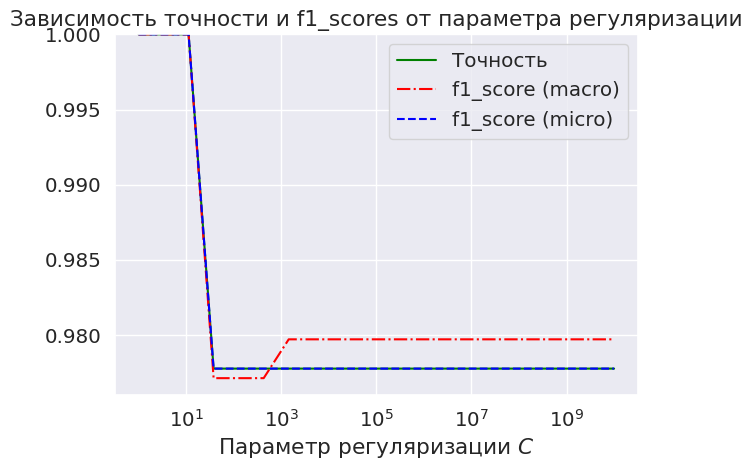

In [329]:
plt.plot(
    linear_regression_history["alpha"],
    linear_regression_history["accuracy"],
    color="green",
    ls="-",
    label="Точность",
)

# График f1_score (macro)
plt.plot(
    linear_regression_history["alpha"],
    linear_regression_history["f1_score"],
    color="red",
    ls="dashdot",
    label="f1_score (macro)",
)

# График f1_score (micro)
plt.plot(
    linear_regression_history["alpha"],
    linear_regression_history["f1_score_micro"],
    color="blue",
    ls="--",
    label="f1_score (micro)",
)

# Настройка графика
plt.xlabel(r"Параметр регуляризации $C$")
plt.ylim((None, 1))
plt.xscale("log")  # Установить логарифмическую шкалу по оси X
plt.tight_layout()
plt.legend()
plt.title("Зависимость точности и f1_scores от параметра регуляризации")
plt.show()

<b><font color="#00b565" size="5">Конец исправлений</font></b>


Как видим, дерево справляется с классификацией лучше чем логистическая регрессия. Вероятно это связано с тем, что данные линейно плохо отделимы.

**3.** Предположим, что мы не различаем классы 1 и 2. Объедините эти два класса и посмотрите на полученное соотношение классов.

In [330]:
y_train_combined = np.where(y_train == 2, 1, y_train)
y_test_combined = np.where(y_test == 2, 1, y_test)

y_train_united = Counter(y_train_combined)
y_test_united = Counter(y_test_combined)

train_total = len(y_train_combined)
test_total = len(y_test_combined)

print("Соотношение классов в y_train после объединения:")
for class_label, count in y_train_united.items():
    print(f"Класс {class_label}: {count} ({count / train_total * 100:.2f}%)")

print("\nСоотношение классов в y_test после объединения:")
for class_label, count in y_test_united.items():
    print(f"Класс {class_label}: {count} ({count / test_total * 100:.2f}%)")

Соотношение классов в y_train после объединения:
Класс 0: 44 (33.08%)
Класс 1: 89 (66.92%)

Соотношение классов в y_test после объединения:
Класс 0: 15 (33.33%)
Класс 1: 30 (66.67%)


Подберите параметры с помощью кросс-валидации для лучшего типа модели (логистическая регрессия, решающее дерево) из первой части задачи. В рамках кросс-валидации посчитайте также метрики Precision и Recall. Как изменились оптимальные параметры?

In [331]:
tree_gridsearch = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "max_depth": np.arange(1, 15),
        "min_samples_split": [2, 3, 5, 8, 10, 13],
        "criterion": ["gini", "entropy"],
    },
)

tree_gridsearch.fit(X_train, y_train_combined)
show_score_greadserch(
    tree_gridsearch, X_train, y_train_combined, X_test, y_test_combined
)

y_pred = tree_gridsearch.best_estimator_.predict(X_test)

precision = precision_score(y_test_combined, y_pred, average="macro")
recall = recall_score(y_test_combined, y_pred, average="macro")

print(f"Precision = {precision:.2f}, Recall = {recall:.2f}")

Лучшие параметры: {'criterion': 'entropy', 'max_depth': np.int64(6), 'min_samples_split': 8}
Лучшая точность на кросс-валидации: 0.963
Accuracy на тестовых данных: 0.933
F1-макро на тестовых данных: 0.928
F1-микро на тестовых данных: 0.933
Precision = 0.92, Recall = 0.95


/home/alexander/.local/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [332]:
linear_gridsearch = GridSearchCV(
    estimator=LogisticRegression(fit_intercept=True, max_iter=500),
    param_grid={"C": np.linspace(1e-6, 1e-4, 20)},
)

linear_gridsearch.fit(X_train, y_train_combined)
show_score_greadserch(
    linear_gridsearch, X_train, y_train_combined, X_test, y_test_combined
)

y_pred_logreg = linear_gridsearch.best_estimator_.predict(X_test)

precision = precision_score(y_test_combined, y_pred, average="macro")
recall = recall_score(y_test_combined, y_pred, average="macro")

print(f"Precision = {precision:.2f}, Recall = {recall:.2f}")

Лучшие параметры: {'C': np.float64(1e-06)}
Лучшая точность на кросс-валидации: 0.669
Accuracy на тестовых данных: 0.667
F1-макро на тестовых данных: 0.400
F1-микро на тестовых данных: 0.667
Precision = 0.92, Recall = 0.95


Видим, что глубина дерева увеличилась и min_samples_split, остальные параметры дерева изменились минорно. Заметим, что теперь результаты логистической регрессии стали лучше, и почти сравнялись с результатами дерева. 

Также хочется отметить, что теперь recall и precision дерева и логистической регрессии почти совпадают.

Постройти графики ROC и PR кривых для модели с подобранными гиперпараметрами. Какой вывод можно сделать?

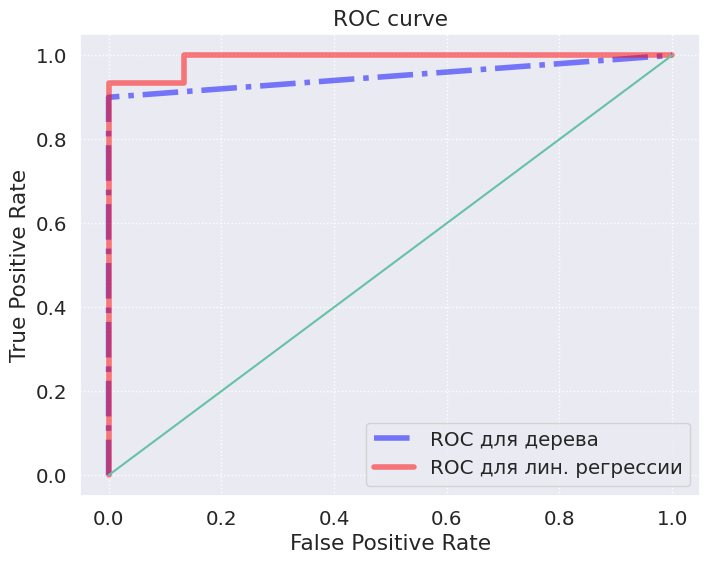

In [333]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(
    y_test_combined, tree_gridsearch.best_estimator_.predict_proba(X_test)[:, 1]
)

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(
    y_test_combined, linear_gridsearch.best_estimator_.predict_proba(X_test)[:, 1]
)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_tree,
    tpr_tree,
    lw=4,
    label="ROC для дерева",
    color="blue",
    alpha=0.5,
    ls="dashdot",
)
plt.plot(
    fpr_logreg, tpr_logreg, lw=4, label="ROC для лин. регрессии", color="red", alpha=0.5
)
plt.plot([0, 1], [0, 1])
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(ls=":")
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()
plt.show()

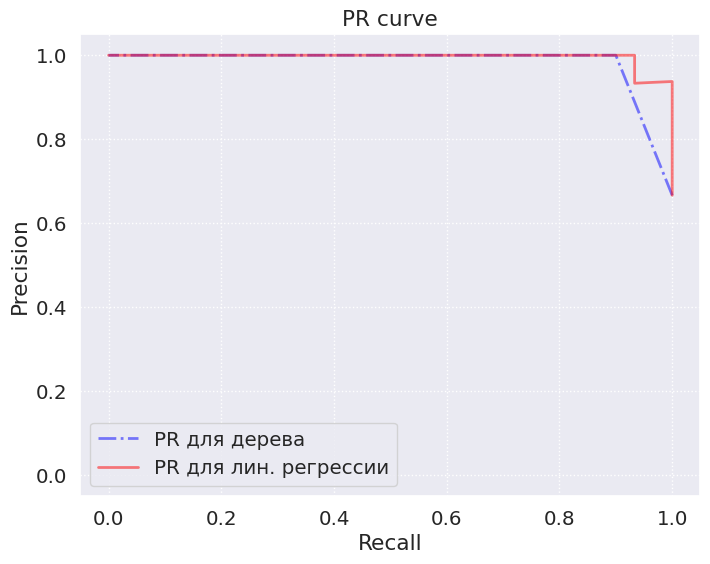

In [334]:
precisions_tree, recalls_tree, thresholds_tree = precision_recall_curve(
    y_test_combined, tree_gridsearch.best_estimator_.predict_proba(X_test)[:, 1]
)

precisions_logreg, recalls_logreg, thresholds_logreg = precision_recall_curve(
    y_test_combined, linear_gridsearch.best_estimator_.predict_proba(X_test)[:, 1]
)

plt.figure(figsize=(8, 6))
plt.plot(
    recalls_tree,
    precisions_tree,
    lw=2,
    label="PR для дерева",
    color="blue",
    alpha=0.5,
    ls="dashdot",
)
plt.plot(
    recalls_logreg,
    precisions_logreg,
    lw=2,
    label="PR для лин. регрессии",
    color="red",
    alpha=0.5,
)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(ls=":")
plt.title("PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

Выберите два порога, посчитайте для них метрики бинарной классификации и придумайте по одной ситутации, где один порог лучше другого.

In [335]:
threshold1 = thresholds_tree[0]
threshold2 = thresholds_logreg[-1]


def calculate_metrics(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    precision = precision_score(y_true, y_pred, average="binary")
    recall = recall_score(y_true, y_pred, average="binary")
    return precision, recall


precision1_tree, recall1_tree = calculate_metrics(
    y_test_combined,
    tree_gridsearch.best_estimator_.predict_proba(X_test)[:, 1],
    threshold1,
)
precision2_tree, recall2_tree = calculate_metrics(
    y_test_combined,
    tree_gridsearch.best_estimator_.predict_proba(X_test)[:, 1],
    threshold2,
)

precision1_logreg, recall1_logreg = calculate_metrics(
    y_test_combined,
    linear_gridsearch.best_estimator_.predict_proba(X_test)[:, 1],
    threshold1,
)
precision2_logreg, recall2_logreg = calculate_metrics(
    y_test_combined,
    linear_gridsearch.best_estimator_.predict_proba(X_test)[:, 1],
    threshold2,
)

print(
    f"Метрики для порога {threshold1:.2f} (Решающее дерево): Precision = {precision1_tree:.2f}, Recall = {recall1_tree:.2f}"
)
print(
    f"Метрики для порога {threshold2:.2f} (Решающее дерево): Precision = {precision2_tree:.2f}, Recall = {recall2_tree:.2f}"
)

print(
    f"Метрики для порога {threshold1:.2f} (Логистическая регрессия): Precision = {precision1_logreg:.2f}, Recall = {recall1_logreg:.2f}"
)
print(
    f"Метрики для порога {threshold2:.2f} (Логистическая регрессия): Precision = {precision2_logreg:.2f}, Recall = {recall2_logreg:.2f}"
)

Метрики для порога 0.00 (Решающее дерево): Precision = 0.67, Recall = 1.00
Метрики для порога 0.67 (Решающее дерево): Precision = 1.00, Recall = 0.90
Метрики для порога 0.00 (Логистическая регрессия): Precision = 0.67, Recall = 1.00
Метрики для порога 0.67 (Логистическая регрессия): Precision = 1.00, Recall = 0.03


Как видим, порог 0.95 оказался лучше порога 0 для решающего дерева.

В случае же с логистической регрессией порог 0 лучше чем порог 0.95.

**Выводы:** В задаче мы на практике использовали методы кросс валидации. Сравнили характеристики работы решающего дерева, в том числе рассмотрели случай когда дерево выполняет классификацию лучше чем регрессия, и случай когда их метрики примерно равны. В конце мы визуализировали полученные численные метрики.

---
### Задача 2

Рассмотрим модель с наилучшими гиперпараметрами из предыдущей задачи для бинарной классификации. Исследуем свойства различных подходов валидации. В качестве метрики используйте F1-метрику.

Выполните не менее 100 следующих итераций.
1. Перемешайте исходные данные.
2. Выполните подход с однократным разбиением:
    * разделите перемешанные даннные на обучающую и валидационную выборку,
    * обучите модель на обучающей выборке,
    * посчитайте качество модели на валидационной выборке и сохраните это значение.
3. Выполните KFold-валидацию:
    * примените KFold к перемешанным даннным, выполняя разбиение на 5 фолдов,
    * посчитайте среднее и дисперсию качества моделей по фолдам и сохраните эти значение.
4. Аналогично примените ShuffleSplit-валидацию, выполнив 5 ее итераций. На каждой итерации размер валидационной части должен совпадать с тем, который был использован в KFold. Иначе говоря, нужно использовать `ShuffleSplit(n_splits=5, test_size=0.2)`.
5. Повторите пункты 2-4 для стратифицированных разбиений.

*Проверьте, что на разных итерациях у вас получаются разные значения метрик. Если одинаковые, то может быть где-то нужно отключить `random_state`. Также советуем при отладке кода делать запуски на малое количество итераций.*

In [336]:
def get_f1_score(model, X, y):
    y_pred = model.predict(X)
    return f1_score(y, y_pred)


def get_expectation_and_variance(sample):
    mean = np.mean(sample)
    variance = np.var(sample, ddof=1)

    return mean, variance


<b><font color="#00b565" size="5">Добавил скалирование</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Данные отскалированы/стандартизированы до разбиения на фолды. Комм. См.  комментарий к прошлой задаче.


Проблема решена в прошлой задаче

<b><font color="#00b565" size="5">Конец исправленией</font></b>



In [337]:
def cross_validation_iterations(
    X,
    y,
    iterations,
    tree_f1_history,
    logreg_f1_history,
    tree_KFold_history,
    logreg_KFold_history,
    tree_SS_history,
    logreg_SS_history,
    stratified=False,
):
    """
    Функция выполняет цикл из заданного числа итераций для обучения моделей с валидацией.

    Параметры:
    - X, y: данные и таргеты
    - iterations: количество итераций для цикла
    - tree_f1_history, logreg_f1_history: массивы для сохранения значений F1 для дерева решений и логистической регрессии
    - tree_KFold_history, logreg_KFold_history: словари для хранения среднего и дисперсии KFold для дерева решений и логистической регрессии
    - tree_SS_history, logreg_SS_history: словари для хранения среднего и дисперсии ShuffleSplit для дерева решений и логистической регрессии
    - stratified: если True, использовать стратифицированные разбиения (StratifiedKFold и StratifiedShuffleSplit)
    """

    for iteration in range(iterations):
        print(f"Iteration {iteration + 1}/{iterations}", end="\r")

        if stratified:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, stratify=y, shuffle=True, test_size=0.2
            )
        else:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, shuffle=True, test_size=0.2
            )

        tree_model = tree_gridsearch.best_estimator_
        logreg_model = linear_gridsearch.best_estimator_

        tree_model.fit(X_train, y_train)
        logreg_model.fit(X_train, y_train)

        tree_f1_history.append(
            f1_score(y_test, tree_model.predict(X_test), average="macro")
        )
        logreg_f1_history.append(
            f1_score(y_test, logreg_model.predict(X_test), average="macro")
        )

        if stratified:
            kf = StratifiedKFold(n_splits=5, shuffle=True)
        else:
            kf = KFold(n_splits=5, shuffle=True)

        kf_scores_tree = cross_val_score(
            tree_model, X_train, y_train, cv=kf, scoring="f1_macro"
        )
        kf_scores_logreg = cross_val_score(
            logreg_model, X_train, y_train, cv=kf, scoring="f1_macro"
        )

        if stratified:
            ss = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
        else:
            ss = ShuffleSplit(n_splits=5, test_size=0.2)

        ss_scores_tree = cross_val_score(
            tree_model, X_train, y_train, cv=ss, scoring="f1_macro"
        )
        ss_scores_logreg = cross_val_score(
            logreg_model, X_train, y_train, cv=ss, scoring="f1_macro"
        )

        kf_mean_tree, kf_var_tree = get_expectation_and_variance(kf_scores_tree)
        kf_mean_logreg, kf_var_logreg = get_expectation_and_variance(kf_scores_logreg)

        tree_KFold_history["Expectation"].append(kf_mean_tree)
        tree_KFold_history["Variance"].append(kf_var_tree)
        logreg_KFold_history["Expectation"].append(kf_mean_logreg)
        logreg_KFold_history["Variance"].append(kf_var_logreg)

        ss_mean_tree, ss_var_tree = get_expectation_and_variance(ss_scores_tree)
        ss_mean_logreg, ss_var_logreg = get_expectation_and_variance(ss_scores_logreg)

        tree_SS_history["Expectation"].append(ss_mean_tree)
        tree_SS_history["Variance"].append(ss_var_tree)
        logreg_SS_history["Expectation"].append(ss_mean_logreg)
        logreg_SS_history["Variance"].append(ss_var_logreg)


X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train_combined, y_test_combined], axis=0)

tree_f1_history = []
logreg_f1_history = []

tree_KFold_history = {"Expectation": [], "Variance": []}
logreg_KFold_history = {"Expectation": [], "Variance": []}

tree_SS_history = {"Expectation": [], "Variance": []}
logreg_SS_history = {"Expectation": [], "Variance": []}

tree_strat_f1_history = []
logreg_strat_f1_history = []

tree_strat_KFold_history = {"Expectation": [], "Variance": []}
logreg_strat_KFold_history = {"Expectation": [], "Variance": []}

tree_strat_SS_history = {"Expectation": [], "Variance": []}
logreg_strat_SS_history = {"Expectation": [], "Variance": []}


cross_validation_iterations(
    X,
    y,
    iterations=100,
    tree_f1_history=tree_f1_history,
    logreg_f1_history=logreg_f1_history,
    tree_KFold_history=tree_KFold_history,
    logreg_KFold_history=logreg_KFold_history,
    tree_SS_history=tree_SS_history,
    logreg_SS_history=logreg_SS_history,
    stratified=False,
)

cross_validation_iterations(
    X,
    y,
    iterations=100,
    tree_f1_history=tree_strat_f1_history,
    logreg_f1_history=logreg_strat_f1_history,
    tree_KFold_history=tree_strat_KFold_history,
    logreg_KFold_history=logreg_strat_KFold_history,
    tree_SS_history=tree_strat_SS_history,
    logreg_SS_history=logreg_strat_SS_history,
    stratified=True,
)

По всем итерациям посчитайте
* выборочную дисперсию среднего качества моделей для каждого из трех подходов, тем самым оценив разброс значений метрик в каждом подходе;
* постройте kde-график среднего качества моделей;
* для подходов KFold и ShuffleSplit посчитайте выборочное среднее дисперсии качества моделей по фолдам, тем самым оценив разброс метрик между фолдами/итерациями.

Начнем с оценки выборочной дисперсии среднего качества моделей.

In [338]:
def calculate_variance_of_expectation(history):
    """
    Функция для подсчета средней выборочной дисперсии по истории валидации.
    """
    mean_variance = np.var(history["Expectation"], ddof=1)
    return mean_variance


def print_mean_variances():
    """
    Функция для подсчета и вывода средней выборочной дисперсии для всех наборов данных.
    """
    mean_variance_tree_KFold = calculate_variance_of_expectation(tree_KFold_history)
    mean_variance_logreg_KFold = calculate_variance_of_expectation(logreg_KFold_history)

    mean_variance_tree_SS = calculate_variance_of_expectation(tree_SS_history)
    mean_variance_logreg_SS = calculate_variance_of_expectation(logreg_SS_history)

    mean_variance_tree_strat_KFold = calculate_variance_of_expectation(
        tree_strat_KFold_history
    )
    mean_variance_logreg_strat_KFold = calculate_variance_of_expectation(
        logreg_strat_KFold_history
    )

    mean_variance_tree_strat_SS = calculate_variance_of_expectation(
        tree_strat_SS_history
    )
    mean_variance_logreg_strat_SS = calculate_variance_of_expectation(
        logreg_strat_SS_history
    )

    print(
        f"Средняя выборочная дисперсия среднего для дерева решений (KFold): {mean_variance_tree_KFold:.4f}"
    )
    print(
        f"Средняя выборочная дисперсия среднего для логистической регрессии (KFold): {mean_variance_logreg_KFold:.4f}"
    )

    print(
        f"Средняя выборочная дисперсия среднего для дерева решений (ShuffleSplit): {mean_variance_tree_SS:.4f}"
    )
    print(
        f"Средняя выборочная дисперсия среднего для логистической регрессии (ShuffleSplit): {mean_variance_logreg_SS:.4f}"
    )

    print(
        f"Средняя выборочная дисперсия среднего для дерева решений (Stratified KFold): {mean_variance_tree_strat_KFold:.4f}"
    )
    print(
        f"Средняя выборочная дисперсия среднего для логистической регрессии (Stratified KFold): {mean_variance_logreg_strat_KFold:.4f}"
    )

    print(
        f"Средняя выборочная дисперсия среднего для дерева решений (Stratified ShuffleSplit): {mean_variance_tree_strat_SS:.4f}"
    )
    print(
        f"Средняя выборочная дисперсия среднего для логистической регрессии (Stratified ShuffleSplit): {mean_variance_logreg_strat_SS:.4f}"
    )


print_mean_variances()

Средняя выборочная дисперсия среднего для дерева решений (KFold): 0.0004
Средняя выборочная дисперсия среднего для логистической регрессии (KFold): 0.0001
Средняя выборочная дисперсия среднего для дерева решений (ShuffleSplit): 0.0007
Средняя выборочная дисперсия среднего для логистической регрессии (ShuffleSplit): 0.0002
Средняя выборочная дисперсия среднего для дерева решений (Stratified KFold): 0.0004
Средняя выборочная дисперсия среднего для логистической регрессии (Stratified KFold): 0.0000
Средняя выборочная дисперсия среднего для дерева решений (Stratified ShuffleSplit): 0.0006
Средняя выборочная дисперсия среднего для логистической регрессии (Stratified ShuffleSplit): 0.0000


<b><font color="#00b565" size="5">Добавил kde графики среднего качества </font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Нет kde графиков среднего качества моделей. Инд. комм. Нужны были графики для всех способов разбиения

Теперь построим kde-графики

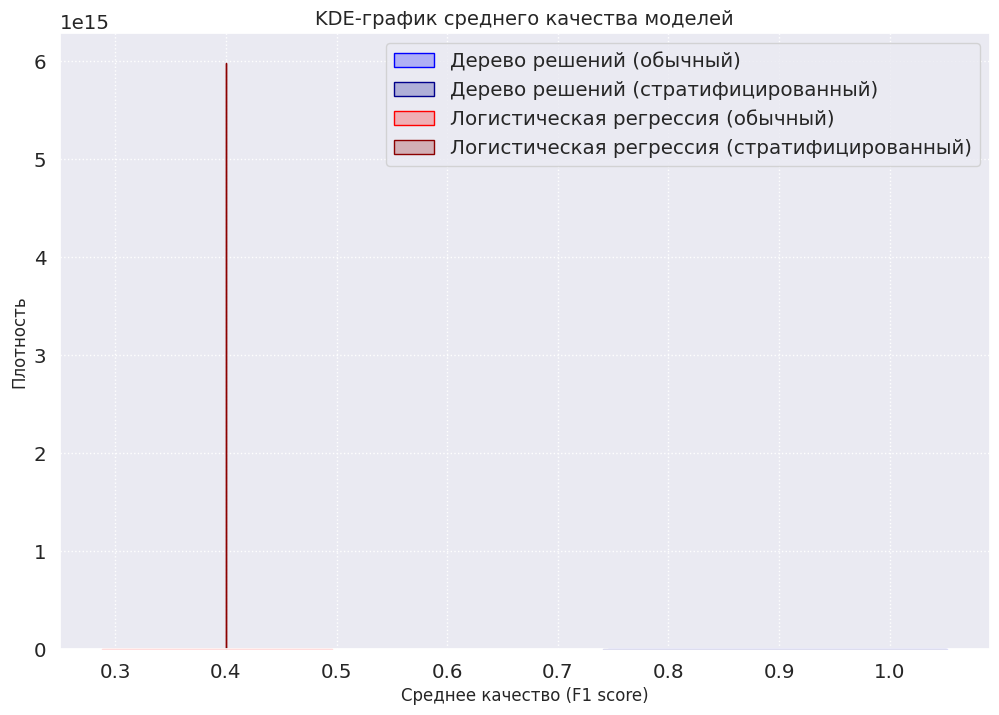

In [339]:
def plot_kde_mean_quality(
    tree_f1_history, logreg_f1_history, tree_strat_f1_history, logreg_strat_f1_history
):
    """
    Функция для построения KDE-графика среднего качества моделей.
    """
    plt.figure(figsize=(12, 8))

    sns.kdeplot(
        tree_f1_history, label="Дерево решений (обычный)", fill=True, color="blue"
    )
    sns.kdeplot(
        tree_strat_f1_history,
        label="Дерево решений (стратифицированный)",
        fill=True,
        color="darkblue",
    )

    sns.kdeplot(
        logreg_f1_history,
        label="Логистическая регрессия (обычный)",
        fill=True,
        color="red",
    )
    sns.kdeplot(
        logreg_strat_f1_history,
        label="Логистическая регрессия (стратифицированный)",
        fill=True,
        color="darkred",
    )

    plt.title("KDE-график среднего качества моделей", fontsize=14)
    plt.xlabel("Среднее качество (F1 score)", fontsize=12)
    plt.ylabel("Плотность", fontsize=12)
    plt.legend()
    plt.grid(ls=":")
    plt.show()


plot_kde_mean_quality(
    tree_f1_history, logreg_f1_history, tree_strat_f1_history, logreg_strat_f1_history
)

<b><font color="#00b565" size="5">Конец исправлений</font></b>

Наконец выполним последний пункт

In [340]:
def calculate_mean_variance(kfold_history, ss_history, stratified=False, name="дерева"):
    """
    Функция для вычисления выборочного среднего дисперсии качества моделей по фолдам.
    Параметры:
    - kfold_history: словарь с данными для KFold.
    - ss_history: словарь с данными для ShuffleSplit.
    - stratified: логический флаг, указывает, используется ли стратификация.
    """
    mean_variance_kfold = np.mean(kfold_history["Variance"])
    mean_variance_ss = np.mean(ss_history["Variance"])

    if stratified:
        print(
            f"Среднее значение дисперсии {name} (KFold, стратифицированный):{mean_variance_kfold:.2g}"
        )
        print(
            f"Среднее значение дисперсии {name} (ShuffleSplit, стратифицированный):{mean_variance_ss:.2g}"
        )
    else:
        print(f"Среднее значение дисперсии {name} (KFold): {mean_variance_kfold:.2g}")
        print(
            f"Среднее значение дисперсии {name} (ShuffleSplit): {mean_variance_ss:.2g}"
        )


calculate_mean_variance(tree_KFold_history, tree_SS_history, name="дерева")
calculate_mean_variance(logreg_KFold_history, logreg_SS_history, name="лог. регрессии")

calculate_mean_variance(
    tree_strat_KFold_history, tree_strat_SS_history, stratified=True, name="дерева"
)
calculate_mean_variance(
    logreg_strat_KFold_history,
    logreg_strat_SS_history,
    stratified=True,
    name="лог. регрессии",
)

Среднее значение дисперсии дерева (KFold): 0.0023
Среднее значение дисперсии дерева (ShuffleSplit): 0.0023
Среднее значение дисперсии лог. регрессии (KFold): 0.001
Среднее значение дисперсии лог. регрессии (ShuffleSplit): 0.00079
Среднее значение дисперсии дерева (KFold, стратифицированный):0.0022
Среднее значение дисперсии дерева (ShuffleSplit, стратифицированный):0.0022
Среднее значение дисперсии лог. регрессии (KFold, стратифицированный):2.1e-05
Среднее значение дисперсии лог. регрессии (ShuffleSplit, стратифицированный):0


Сделайте выводы о свойствах подходов, их преимуществах и недостатках.

**Выводы:**

1. Мы видим, что среднее отклонение для всех моделей примерно одного порядка. Но стратификация все же помогает незначительно его снизить.

2. Мы видим, по kde-графику, что в нашей задаче дерево решает задачу лучше, чем лог регрессия(тк. "холмы" плотности дерева расположены правее, чем лог регрессии), причем пик при стратифицированной SplitShuffle валидации находится выше, что свидетельствует о том, что при стратификации модель становится более устойчивой. Вместе с тем, отметим, что стратификация никак не повлияла на график логистической регрессии. 

3. Как и в прошлом пункте, среднее значение дисперсии при стратификации уменьшатся только для дерева, для логистической регрессии показатели остались примерно теми же. Это происходит из-за того что в решающих деревьях стратификация может улучшить стабильность предсказаний, балансировки классов в каждом фолде.

Отсюда можно сделать вывод, что при использовании решающих деревьев имеет смысл использовать стратифицированные данные для кросс-валидации, так как это обеспечивает более точный ответ. В то же время мы заметили, что стратификации никак не влияет на значение кросс-валидации для логистической регрессии. Это может быть связано с тем, что в предложенном датасете нет выраженного дисбаланса классов.

---
### Задача 3

Каждый студент DS-потока должен написать свое дерево. Что ж, время пришло...

*Советы.*
* Для отладки кода советуем строить простые деревья глубины 1-3 на простых датасетах по 10-20 объектах, печатать обучаемые параметры и т.д.. Если все хорошо работает, в финальном решении убирайте отладочный вывод.
* Сравните качество реализованного дерева с качеством реализации из sklearn. Ровно такое же качество вы можете не получить из-за различных небольших оптимизаций, но если качество отличается на порядок, стоит проверить свою реализацию.
* Сначала лучше разобраться с одной задачей (регрессией или классификацией), а затем переходить к другой.

Вспомним, как именно происходит построение решающего дерева. Для построения дерева в каждой нелистовой вершине происходит разбиение подвыборки на две части по некоторому признаку $x_j$. Этот признак и порог $t$, по которому будет происходить разбиение, мы хотим брать не произвольно, а основываясь на соображениях оптимальности.  Для этого нам необходимо знать некоторый фукционал качества, который будем оптимизировать при построении разбиения. 

Обозначим через $X_m$ — множество объектов, попавших в вершину $m$, разбиваемую на данном шаге, а через $X_\ell$ и $X_r$ — объекты, попадающие в левое и правое поддерево соответственно при заданном правиле $I\{x_j < t\}$. Пусть также $H$ — используемый критерий информативности (impurity criterion).

Выпишите функционал, который необходимо минимизировать при разбиении вершины:

**Ответ:** $Q(X_m, j, t) = \frac{|X_l|}{|X_m|}\cdot H(X_l) + \frac{|X_r|}{|X_m|}\cdot H(X_r) \rightarrow \underset{t,j}{\min}$

**Реализация критериев информативности.**


Вспомните еще раз, на какой общей идее основаны критерии информативности и какую характеристику выборки они стремятся оптимизировать?

**Ответ:** Критерий информативности показывает разброс ответов в вершине, т.е. качество подвыборки X.
Чем меньше разброс ответов в вершине, тем меньше значение H(X). Значит H(X) оптимизирует характеристику единообразия выборки.


Перед тем, как непосредственно работать с решающими деревьями, реализуйте функции подсчёта значения критериев разбиения вершин решающих деревьев. Использовать готовые реализации критериев или классов для решающих деревьев из `sklearn` и из других библиотек **запрещено.** Также при реализации критериев по причине неэффективности **запрещается использовать циклы**. Воспользуйтесь библиотекой `numpy`.

Каждая функция принимает на вход одномерный `numpy` — массив размерности `(n,)` из значений отклика.

<b><font color="#00b565" size="5">Исправил функцию абсолютных потерь</font></b>

<b><font color="#00b565" size="3">Замечание</font></b> Ошибка реализации критерия абсолютной функции потерь. Комм. Взято среднее вместо медианы.


In [341]:
# Код функций, реализующих критерии разбиения.


def mean_square_criterion(y):
    """Критерий для квадратичной функции потерь."""
    size = np.array(y).shape[0] if np.array(y).shape[0] != 0 else 1
    y_mean = np.mean(y)

    criterion = np.sum(np.power(y - y_mean, 2)) / size
    return criterion


def mean_abs_criterion(y):
    """Критерий для абсолютной функции потерь (использует медиану)."""
    size = np.array(y).shape[0] if np.array(y).shape[0] != 0 else 1
    y_median = np.median(y)

    criterion = np.abs(np.sum(y - y_median)) / size
    return criterion


# def get_probs_by_y(y):
#     """Возвращает вектор частот для каждого класса выборки."""
#     unique_classes, counts = np.unique(y, return_counts=True)

#     probs = counts / counts.sum() if counts.sum() > 0 else np.zeros(len(unique_classes))
#     return probs

def get_probs_by_y(y_values, unqie_classes=2):
    class_counts = np.bincount(y_values, minlength=unqie_classes)
    return class_counts / len(y_values)


def gini_criterion(y):
    """Критерий Джини."""
    probs = get_probs_by_y(y)
    G = np.sum(probs * (1 - probs))
    return G


def entropy_criterion(y):
    """Энтропийный критерий."""
    probs = get_probs_by_y(y)
    H = -np.sum(probs * np.log(probs + 1e-10))
    return H

<b><font color="#00b565" size="5">Конец исправлений</font></b>

Протестируйте реализованные функции.

Тесты для распределения вероятностей на классах.

In [342]:
assert np.allclose(get_probs_by_y([0, 0, 1, 1, 2], 3), np.array([0.4, 0.4, 0.2]))
assert np.allclose(get_probs_by_y([0], 1), np.array([1]))


Тесты для критериев разбиения.

In [343]:
assert np.allclose(entropy_criterion([25]), 0)
assert np.allclose(gini_criterion([25]), 0)
assert np.allclose(mean_square_criterion([10, 10, 10]), 0)
assert np.allclose(mean_abs_criterion([10, 10, 10]), 0)

**Реализация класса решающего дерева.**

Для того, чтобы лучше понять, как устроены решающие деревья и как именно устроен процесс их построения, вам предлагается реализавать класс `BaseDecisionTree`, реализующий базовые функции решающего дерева.  Большая часть кода уже написана. 

Используются следующие классы:

**Класс** `BaseDecisionTree` — класс для решающего дерева, в котором реализовано построение дерева. Все вершины дерева хранятся в списке `self.nodes`, при этом вершина с номером 0 — корень.


* `__init__` — инициализация дерева. Здесь сохраняются гиперпараметры дерева: `criterion`, `max_depth`, `min_samples_split` и инициализируется список вершин, состоящий только из одной вершины — корневой,
* `build_` — рекурсивная функция построения дерева. В ней при посещении каждой вершины дерева проверяются условия, стоит ли продолжать разбивать эту вершину. Если да, то перебираются все возможные признаки и пороговые значения и выбирается та пара (признак, значение), которой соответствует наименьшее значение критерия информативности,
* `fit` — функция обучения дерева, принимающая на вход обучающую выборку. В этой функции происходит предподсчёт всех возможных пороговых значений для каждого из признаков, а затем вызывается функция `build_`.

**Класс** `Node` — класс вершины дерева. Внутри вершины, помимо раздяляющего признака и порога хранятся `self.left_son`, `self.right_son` — номера дочерних вершин, а также `self.left_prob` и `self.right_prob` — вероятности попадания элемента в каждую из них. При этом в листовых вершиных хранятся также `self.y_values` — значения соответствующих элементов выборки, попавших в вершину.

* `__init__` — инициализация вершины. Принимает в качестве аргументов разделяющий признак и пороговое значение и сохраняет их.

**Класс** `DecisionTreeRegressor` — наследник класса `BaseDecisionTree`, в котором реализованы функции для предсказаний при решении задачи регрессии.

* `predict_instance` — получение предсказания для одного элемента выборки. Выполняется посредством спуска по решающему дереву до листовой вершины,

* `predict` — получение предсказаний для всех элементов выборки.


**Класс** `DecisionTreeClassifier` — наследник класса `BaseDecisionTree`, в котором реализованы функции для предсказаний при решении задачи классификации.
* `predict_proba_instance` — предсказание распределения вероятностей по классам для одного элемента выборки, 
* `predict_proba` — предсказание распределения вероятностей по классам для всех элементов выборки,
* `predict` — предсказание меток классов для всех элементов выборки.

Перед написанием кода разбиения дерева, ответьте на вопрос, какие пороговые значения для каждого из признаков вы будете перебирать. Почему рассматривать другие значения в качестве пороговых не имеет смысла?

**Ответ:** В качестве порогов для каждого признака мы будем рассматривать значения, которые лежат между соседними уникальными значениями признака. Это позволяет нам учесть все возможные точки разделения между объектами в выборке. Рассматривать значения, находящиеся вне диапазона данных, нет смысла, так как они не улучшат разделение для текущей выборки.

**Структура решающего дерева**


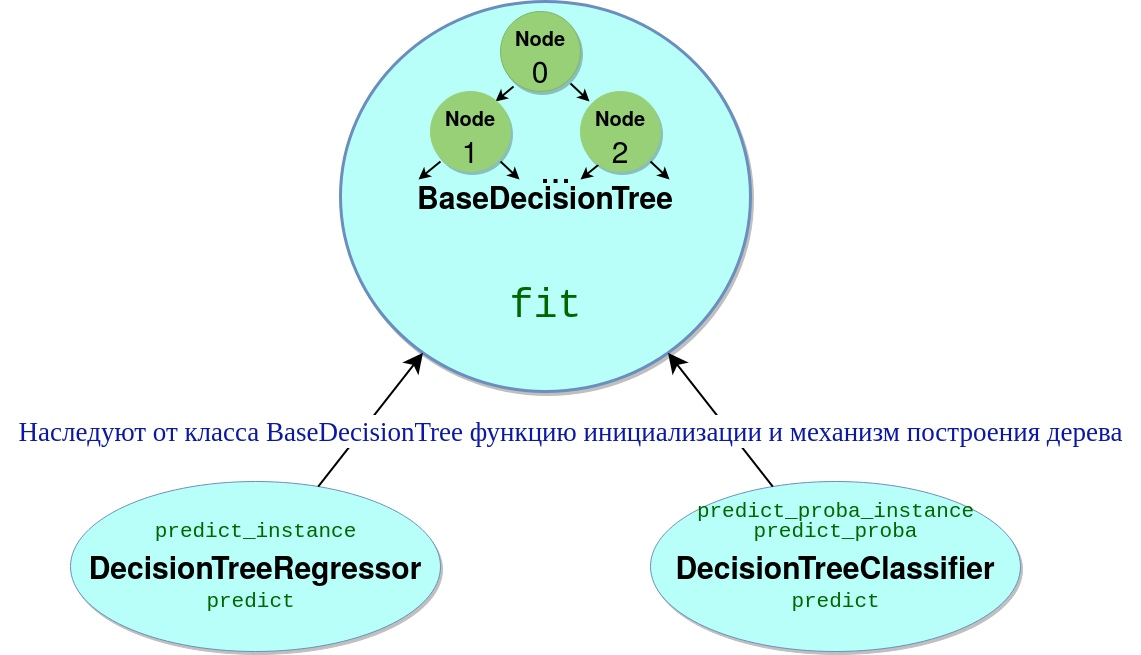

In [344]:
def get_not_nans(arr):
    """
    Функция, которая создаёт и возвращает новый массив
    из всех элементов переданного массива, не являющихся None.
    """
    arr = pd.to_numeric(arr, errors='coerce')  
    return arr.copy()[~np.isnan(arr)]


class Node(object):
    def __init__(self, split_feature=None, split_threshold=None):
        """
        Функция инициализации вершины решающего дерева.

        Параметры.
        1) split_feature — номер разделяющего признака
        2) split_threshold — пороговое значение
        """
        self.split_feature = split_feature
        self.split_threshold = split_threshold

        # По умолчанию считаем, что у вершины нет дочерних вершин.
        self.left_son, self.right_son = None, None

        # Вероятности попадания в каждую из дочерних вершин нужно поддерживать
        # для корректной обработки данных с пропусками
        self.left_prob, self.right_prob = 0, 0

        # Массив значений y. Определён только для листовых вершин дерева
        self.y_values = None


class BaseDecisionTree(BaseEstimator):
    """
    Здесь содержится реализация всех основных функций для работы
    с решающим деревом.
    """

    def __init__(
        self,
        criterion=mean_square_criterion,
        max_depth=np.inf,
        min_samples_split=2,
        size_of_averaged_threshold=1,
    ):
        """
        Функция инициализации решающего дерева.

        Параметры.
        1) criterion — критерий информативности,
        2) max_depth — максимальная глубина дерева,
        3) min_samples_split — минимальное количество элементов
        4) size_of_averaged_threshold - размер групп усреднения thresholds
        обучающей выборки,  которое должно попасть в вершину,
        чтобы потом происходило разбиение этой вершины.
        """
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.size_of_averaged_threshold = size_of_averaged_threshold

        # Список всех вершин дерева. В самом начале
        # работы алгоритма есть только одна
        # вершина — корень.
        self.nodes = [Node()]

        # Количество классов. Актуально только
        # при решении задачи классификации.
        self.class_count = 1

        # Сюда нужно будет записать все значения
        # для каждого из признаков датасета
        # (они будут нашими порогами).
        self.feature_values = None

    def build_(self, v, X, y, depth=0):
        """
        Рекурсивная функция построения решающего дерева.
        """
        if depth == self.max_depth or len(y) < self.min_samples_split:
            # Еcли строим дерево для классификации, то
            # сохраняем метки классов всех элементов выборки,
            # попавших в вершину.
            if callable(getattr(self, "set_class_count", None)):
                self.nodes[v].y_values = y.copy()

            # Для регрессии сразу вычислим среднее всех
            # элементов вершины, проверяя на пустоту массива
            else:
                if y.size > 0:  # Проверяем, не пуст ли массив y
                    self.nodes[v].y_values = np.mean(y)
                else:
                    self.nodes[v].y_values = None
            
            return

        best_criterion_value = np.inf
        best_feature, best_threshold = 0, 0
        sample_size, feature_count = X.shape

        # Переберём все возможные признаки и значения порогов
        for feature_id in range(feature_count):
            tmp_X = X[:, feature_id]

            # Попробуем оптимизировать количество трешхолдов
            # путем усреднения каждых k точек
            avereged_thresholds = self._optimize_threshold(
                self.feature_values[feature_id], self.size_of_averaged_threshold
            )
            np.random.shuffle(avereged_thresholds)
            for threshold in avereged_thresholds:
                mask_l = tmp_X < threshold
                mask_r = tmp_X >= threshold
                X_l = tmp_X[mask_l]
                y_l = y[mask_l]
                X_r = tmp_X[mask_r]
                y_r = y[mask_r]
                # Проверяем, не пустые ли массивы X_left и X_right перед вычислением
                Q = 0
                if X_l.size > 0 and X_r.size > 0:
                    Q = X_l.shape[0] * self.criterion(y_l) + X_r.shape[
                        0
                    ] * self.criterion(y_r)
                else:
                    Q = (
                        np.inf
                    )  # Устанавливаем очень большое значение, чтобы не выбрать этот порог

                if Q < best_criterion_value:
                    best_feature, best_threshold = feature_id, threshold
                    best_criterion_value = Q

        # Сохраняем найденные параметры в класс текущей вершины
        self.nodes[v].split_feature = best_feature
        self.nodes[v].split_threshold = best_threshold
        # Разделим выборку на 2 части по порогу
        mask_l = X[:, best_feature] < best_threshold
        mask_r = X[:, best_feature] >= best_threshold
        X_l = X[mask_l]
        y_l = y[mask_l]
        X_r = X[mask_r]
        y_r = y[mask_r]


        # Создаём левую и правую дочерние вершины
        self.nodes.append(Node())
        self.nodes.append(Node())

        # Сохраняем индексы созданных вершин
        self.nodes[v].left_son, self.nodes[v].right_son = (
            len(self.nodes) - 2,
            len(self.nodes) - 1,
        )

        left_size = len(y_l)
        right_size = len(y_r)
        total_size = left_size + right_size
        
        self.nodes[self.nodes[v].right_son].right_prob = right_size / total_size
        self.nodes[self.nodes[v].right_son].left_prob = 1 - right_size / total_size

        self.nodes[self.nodes[v].left_son].left_prob = left_size / total_size
        self.nodes[self.nodes[v].left_son].right_prob = 1 - left_size / total_size


        # Рекурсивно строим дерево для дочерних вершин
        self.build_(self.nodes[v].left_son, X_l, y_l, depth + 1)
        self.build_(self.nodes[v].right_son, X_r, y_r, depth + 1)

    def fit(self, X, y):
        """
        Функция, из которой запускается построение
        решающего дерева по обучающей выборке.
        """
        # Сохраним заранее все пороги для каждого из признаков
        X, y = np.array(X), np.array(y)
        self.feature_values = []
        for feature_id in range(X.shape[1]):
            self.feature_values.append(np.unique(get_not_nans(X[:, feature_id])))

        set_class_count = getattr(self, "set_class_count", None)

        # Если строится дерево для классификации
        if callable(set_class_count):
            set_class_count(y)
        self.build_(0, X, y)

    def _optimize_threshold(self, thresholds, k=5):
        sorted_values = np.sort(thresholds)
        averaged_values = []

        for i in range(0, len(sorted_values), k):
            group = sorted_values[i : i + k]
            averaged_values.append(np.mean(group))

        averaged_values = np.array(averaged_values)

        return averaged_values

Теперь, когда общий код решающего дерева написан, нужно сделать обёртки над `BaseDecisionTree` — классы `DecisionTreeRegressor` и `DecisionTreeClassifier` для использования решающего дерева в задачах регрессии и классификации соответственно.

Допишите функции `predict_instance` и `predict_proba_instance` в классах для регрессии и классификации соответственно. В этих функциях нужно для одного элемента $x$ выборки промоделировать спуск в решающем дереве, а затем по листовой вершине, в которой окажется объект, посчитать для классификации — распределение вероятностей, а для регрессии — число $y$.

In [345]:
class DecisionTreeRegressor(BaseDecisionTree):
    def predict_instance(self, x, v):
        """
        Рекурсивная функция, предсказывающая значение
        y для одного элемента x из выборки.

        Параметры.
        1) x — элемент выборки, для которого
        требуется предсказать значение y
        2) v — рассматриваемая вершина дерева
        """

        # если вершина — лист, возвращаем в качестве предсказания
        # среднее всех элементов, содержащихся в ней
        if self.nodes[v].left_son is None:
            return np.mean(self.nodes[v].y_values)

        # если у объекта x значение признака по
        # которому происходит разделение,  меньше
        # порогового, то спускаемся в левое поддерево,
        # иначе — в правое
        if x[self.nodes[v].split_feature] < self.nodes[v].split_threshold:
            return self.predict_instance(x, self.nodes[v].left_son)
        elif x[self.nodes[v].split_feature] >= self.nodes[v].split_threshold:
            return self.predict_instance(x, self.nodes[v].right_son)

        # а если у элемента отсутствует значение
        # разделяющего признака,  то будем спускаться
        # в оба поддерева
        else:
            left_predict = self.predict_instance(x, self.nodes[v].left_son)
            right_predict = self.predict_instance(x, self.nodes[v].right_son)
            return (
                left_predict * self.nodes[v].left_prob
                + right_predict * self.nodes[v].right_prob
            )

    def predict(self, X):
        """
        Функция, предсказывающая значение
        y для всех элементов выборки X.

        Параметры.
        X — выборка, для которой требуется
        получить вектор предсказаний y
        """

        return [self.predict_instance(x, 0) for x in X]

    def score(self, X, y):
        """
        Оценка качества модели на данных X и истинных метках y
        с использованием метрики r2_score (или другой метрики).
        """
        y_pred = self.predict(X)  # Получаем предсказания
        return r2_score(y, y_pred)  # Вычисляем r2_score

Для удобства реализации функции `predict_proba_instance` класса `DecisionTreeClassifier` будем считать, что все классы имеют целочисленные метки от 0 до $k-1$, где $k$ — количество классов. Если бы это условие не было выполнено, то нужно было бы сначала сделать предобработку меток классов в датасете.

<b><font color="#00b565" size="5">Исправил реализацию predict_proba</font></b>

<b><font color="#00b565" size="3"> Замечание:</font></b>Неправильная реализация predict_proba_instance. Инд. комм. Надо брать взвешенное среднее при отсуствии признака. 



In [346]:
class DecisionTreeClassifier(BaseDecisionTree):
    def set_class_count(self, y):
        """
        Функция, вычисляющая количество классов
        в обучающей выборке.

        Параметры.
        y — значения класса в обучающей выборке
        """

        self.class_count = np.unique(y).size

    def predict_proba_instance(self, x, v):
        """
        Рекурсивная функция, предсказывающая вектор
        вероятностей принадлежности  объекта x
        к классам

        Параметры.
        1) x — элемент выборки, для которого
        требуется предсказать значение y
        2) v — вершина дерева, в которой
        находится алгоритм
        """
        if self.nodes[v].left_son is None:
            # считаем долю каждого класса и возвращаем вектор вероятностей
            probs = get_probs_by_y(self.nodes[v].y_values, self.class_count)
            return probs

        # если у объекта x значение признака по которому
        # происходит разделение, меньше порогового,
        # то спускаемся в левое поддерево, иначе — в правое
        if x[self.nodes[v].split_feature] < self.nodes[v].split_threshold:
            return self.predict_proba_instance(x, self.nodes[v].left_son)
        elif x[self.nodes[v].split_feature] >= self.nodes[v].split_threshold:
            return self.predict_proba_instance(x, self.nodes[v].right_son)

        # а если у объекта отсутствует значение
        # разделяющего признака, то будем спускаться
        # в оба поддерева
        else:
            left_predict = self.predict_proba_instance(x, self.nodes[v].left_son)
            right_predict = self.predict_proba_instance(x, self.nodes[v].right_son)
            return (
                left_predict * self.nodes[v].left_prob
                + right_predict * self.nodes[v].right_prob
            )

    def predict_proba(self, X):
        """
        Функция, предсказывающая вектор вероятностей
        принадлежности объекта x к классам для
        каждого x из X

        Параметры.
        X — выборка, для которой требуется получить вектор предсказаний y
        """
        # print([self.predict_proba_instance(x, 0) for x in X])
        return [self.predict_proba_instance(x, 0) for x in X]

    def predict(self, X):
        """
        Функция, предсказывающая метку класса для
        всех элементов выборки X.

        Параметры.
        X — выборка, для которой требуется получить
        вектор предсказаний y
        """
        probabilities = np.array(self.predict_proba(X))
        predictions = np.argmax(probabilities, axis=1)
        return predictions

<b><font color="#00b565" size="5">Конец исправлений</font></b>


**Подбор параметров.**

В этой части задания вам предлагается поработать с написанным решающим деревом, применив его к задачи классификации и регрессии, и в обеих задачах подобрать оптимальные параметры для построения.

Не забывайте писать выводы.

**1. Задача регрессии.**

Теперь самое время протестировать работу написанного нами решающего дерева. В качестве датасете возьмите `boston` из `sklearn`. 

In [347]:
boston_X = load_boston[
    [
        "CRIM",
        "ZN",
        "INDUS",
        "CHAS",
        "NOX",
        "RM",
        "AGE",
        "DIS",
        "RAD",
        "TAX",
        "PTRATIO",
        "B",
        "LSTAT",
    ]
]
boston_y = load_boston[["MEDV"]]
load_boston.head()

MIN_DEPTH = 1
MAX_DEPTH = 15
size_of_averaged_threshold = 50

Далее для критерия `r2_score` найдите оптимальные параметры обучения дерева — `max_depth` и `min_samples_split`. Рассмотрите диапозон значений для `max_depth`: от 3 до 14.

In [348]:
regression_criteria = r2_score
criterion_names = [
    ("MSE критерий", mean_square_criterion),
    ("MAE критерий", mean_abs_criterion),
]
criterion_funcs = [mean_square_criterion, mean_abs_criterion]

С начала надо разбить выборку на train и test.

In [349]:
X_train, X_test, y_train, y_test = train_test_split(
    boston_X, boston_y, test_size=0.2, random_state=42
)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

In [350]:
minmax_scaler = MinMaxScaler()

X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

y_minmax_scaler = MinMaxScaler()
y_train_scaled = y_minmax_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = y_minmax_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [351]:
tree_gridsearch = GridSearchCV(
    estimator=DecisionTreeRegressor(
        criterion=mean_square_criterion,
        size_of_averaged_threshold=size_of_averaged_threshold,
    ),
    param_grid={
        "max_depth": np.arange(MIN_DEPTH, MAX_DEPTH),
        "min_samples_split": [2, 4, 8],
        "criterion": criterion_funcs,
    },
)

tree_gridsearch.fit(X_train_scaled, y_train_scaled)

y_pred = tree_gridsearch.best_estimator_.predict(X_test_scaled)
r2_boston_score = r2_score(y_test_scaled, y_pred)

print(f"Полученный r2_score равен {r2_boston_score:.3f}")

Полученный r2_score равен 0.694


In [352]:
tree_gridsearch.best_params_

{'criterion': <function __main__.mean_square_criterion(y)>,
 'max_depth': np.int64(4),
 'min_samples_split': 4}

Теперь проведите кросс-валидацию для каждого из критериев разбиения вершин.

In [353]:
for criterion_name, criterion in criterion_names:
    model = DecisionTreeRegressor(
        criterion=criterion,
        max_depth=tree_gridsearch.best_params_["max_depth"],
        min_samples_split=tree_gridsearch.best_params_["min_samples_split"]
    )
    ss = ShuffleSplit(n_splits=5, test_size=0.2)

    scores = cross_val_score(
        model, X_train_scaled, y_train_scaled, cv=ss, scoring="r2"
    )  
    print(f"Критерий: {criterion_name}: {np.mean(scores):.3f}")

Критерий: MSE критерий: 0.601
Критерий: MAE критерий: 0.403


Как видим, среднее абсолютное значение дало результат в два раза хуже, чем среднее квадратическое. Вероятно это связано с выпуклостью. Поэтому в дальнейшем будем использовать именно его.

Постройте графики зависимости `r2-score` от максимальной глубины дерева на обучающей и тестовой выборке для каждого критерия на train и на test. В качестве максимальной глубины используйте значения от 1 до 14. Значение `min_samples_split` фиксируйте.

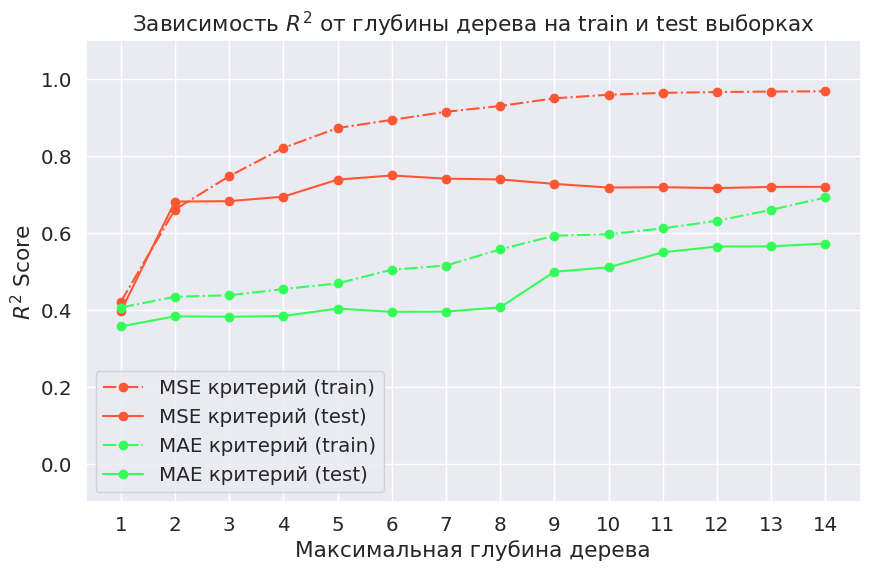

In [354]:
depths = np.arange(MIN_DEPTH, MAX_DEPTH)

models_history = {
    criterion[0]: {"depth": [], "r2_score_train": [], "r2_score_test": []}
    for criterion in criterion_names
}

min_samples_split = tree_gridsearch.best_params_["min_samples_split"]

for criterion_name, criterion in criterion_names:
    for depth in depths:
        model = DecisionTreeRegressor(
            max_depth=depth,
            min_samples_split=min_samples_split,
            criterion=criterion,
            size_of_averaged_threshold=size_of_averaged_threshold
        )

        model.fit(X_train_scaled, y_train_scaled)

        model_r2_score_train = r2_score(y_train_scaled, model.predict(X_train_scaled))
        model_r2_score_test = r2_score(y_test_scaled, model.predict(X_test_scaled))

        models_history[criterion_name]["depth"].append(depth)
        models_history[criterion_name]["r2_score_train"].append(model_r2_score_train)
        models_history[criterion_name]["r2_score_test"].append(model_r2_score_test)

plt.figure(figsize=(10, 6))

colors = [
    "#FF5733",  # Ярко-оранжевый
    "#33FF57",  # Ярко-зеленый
    "#3357FF",  # Ярко-синий
    "#FF33A8",  # Ярко-розовый
    "#FFD700",  # Золотой
    "#8A2BE2",  # Фиолетовый
    "#00CED1",  # Бирюзовый
    "#FF4500",  # Оранжево-красный
    "#ADFF2F",  # Зеленовато-желтый
    "#DC143C",  # Малиновый
    "#FF8C00",  # Темно-оранжевый
    "#7FFF00",  # Лаймово-зеленый
    "#1E90FF",  # Голубой
    "#FF1493",  # Ярко-розовый
    "#4B0082",  # Индиго
]

color_id = 0
for criterion_name, criterion in criterion_names:
    depths = models_history[criterion_name]["depth"]
    r2_train = models_history[criterion_name]["r2_score_train"]
    r2_test = models_history[criterion_name]["r2_score_test"]

    plt.plot(
        depths,
        r2_train,
        label=f"{criterion_name} (train)",
        linestyle="dashdot",
        color=colors[color_id],
        marker="o"
    )
    plt.plot(
        depths,
        r2_test,
        label=f"{criterion_name} (test)",
        linestyle="-",
        color=colors[color_id],
        marker="o"
    )

    color_id += 1

plt.title(r"Зависимость $R^2$ от глубины дерева на train и test выборках")
plt.xlabel("Максимальная глубина дерева")
plt.ylabel(r"$R^2$ Score")
plt.xticks(depths)
plt.ylim((-0.1, 1.1))
plt.legend()
plt.grid(True)
plt.show()

Сделайте вывод, в котором объясните, почему графики получились такими.

Скорее всего, вы заметили, что дерево в этих экспериментах строится довольно медленно. Как можно ускорить его построение? Можно ли ускорить нахождение оптимального разбиения по некоторому вещественному признаку?

Это связано с тем что мы обсчитываем в качестве трешхолда значение каждого признак для каждой координаты вектора. Ускорить метод можно, например путем усреднения по несколько трешхолдов, что сократит время обработки в несколько раз, не сильно повлияв на разбиение.

Как и ожидалось, коэффициент детерминации обсчитанный при использовании MSE в качестве критерия оказался выше, чем при использовании MAE. Вероятно это может быть связано с тем, что MSE более стабильный и чувствительный к выбросам.

Заметим, что с некоторого момента (depth >= 5) модель с MSE начинает преобучаться

**Вывод.**

Нам удалось написать класс решающего дерева, и при помощи коэффициента детерминации оценить насколько хорошо дерево справляется с предсказаниями. При помощи кросс валидации и графика мы продемонстрировали, что в качестве критерия в нашем случае разумно использовать MSE.

**2. Задача классификации, работа с пропусками**

В этом пункте вам предстоит освоиться с обработкой пропусков в решающих деревьях, реализованной ранее.

Рассмотрим датасет, в котором часть данных пропущена. В качестве примера возьмём датасет https://archive.ics.uci.edu/ml/datasets/Adult для определения категории дохода работников, по таким признакам, как возраст, образование, специальность, класс работы, пол, кол-во отрабатываемых часов в неделю и некоторым другим.

In [355]:
column_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education1",
    "education2",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "target",
]

Поскольку предсказание в дереве на данных с пропусками часто занимает сильно больше времени, чем в случае отсутствия пропусков (так как часто приходится спускаться разу в 2 поддерева), то для экономии времени сократим датасет, взяв из него только первые 10000 строк данных.

In [356]:
adult_df = pd.read_csv("adult.csv", header=None)[:10000]
adult_df.columns = column_names
target = adult_df["target"] == ">50K"
adult_df = adult_df.drop(["target"], axis=1)
size_of_averaged_threshold = 2 * size_of_averaged_threshold
adult_df.head()

,age,workclass,fnlwgt,education1,education2,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


Предобработаем датасет, заменив категориальные признаки one-hot векторами.

In [357]:
adult_df = pd.get_dummies(adult_df)
adult_df.head()

,age,fnlwgt,education2,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,30,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Поскольку все пропущенные значения относились к категориальным признакам и помечались в датасете знаком `?`, то для каждого категориального признака `feature` исходного датасета надо выполнить следующую процедуру: рассмотреть признак `feature_?` нового датасета и для всех строк, для которых выполнено `feature_?=1`, значениях всех признаков с префиксом `feature` установить в `None`. 

In [358]:
all_indices = np.arange(adult_df.shape[0])

for feature in column_names:
    if f"{feature}_ ?" in adult_df.columns:
        none_indices = all_indices[adult_df[f"{feature}_ ?"] == 1]

        for dummy_feature in adult_df.columns:
            if not dummy_feature.startswith(f"{feature}_ "):
                continue
            if dummy_feature != f"{feature}_ ?":
                adult_df[dummy_feature][none_indices] = None
        adult_df = adult_df.drop(f"{feature}_ ?", axis=1)

Посмотрим на распределение пропущенных значений по признакам.

In [359]:
np.sum(adult_df.isnull(), axis=0)

age                               0
fnlwgt                            0
education2                        0
capital-gain                      0
capital-loss                      0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 107, dtype: int64

Разобьём данные на обучающую и тестовую выборки в отношении 3:1.

In [360]:
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(
    adult_df, target, random_state=777, test_size=0.25
)

X_adult_train = X_adult_train.to_numpy()
X_adult_test = X_adult_test.to_numpy()
y_adult_train = y_adult_train.to_numpy()
y_adult_test = y_adult_test.to_numpy()

При помощи кросс-валидации найдём оптимальные гиперпараметры `max_depth` и `min_samples_split` для каждого из критериев разбиения деревьев для классификации.

In [361]:
results = {
    "criterion": [],
    "max_depth": [],
    "min_samples_split": [],
    "mean_score": [],
}

criterion_names = [
    ("Энтропийный критерий", entropy_criterion),
    ("Критерий Джини", gini_criterion),
]

depths = np.arange(MIN_DEPTH, MAX_DEPTH)
min_samples_splits = [2, 4, 8]


for criterion_name, criterion in criterion_names:
    for depth in depths:
        for min_samples_split in min_samples_splits:
            print(f"depth:{depth}", end='\r')
            model = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=min_samples_split,
                criterion=criterion,
                size_of_averaged_threshold=size_of_averaged_threshold
            )

            kf = KFold(n_splits=5, shuffle=True)
            scores = cross_val_score(
                model, X_adult_train, y_adult_train, cv=kf, scoring="accuracy"
            )
            mean_score = scores.mean()

            results["criterion"].append(criterion_name)
            results["max_depth"].append(depth)
            results["min_samples_split"].append(min_samples_split)
            results["mean_score"].append(mean_score)

results_df = pd.DataFrame(results)

# print(results_df)

# Поиск оптимальных гиперпараметров
best_results = results_df.loc[results_df['mean_score'].idxmax()]
print("Лучшие гиперпараметры:")
print(best_results)

Лучшие гиперпараметры:
criterion            Критерий Джини
max_depth                         7
min_samples_split                 8
mean_score                   0.8444
Name: 62, dtype: object


Постройте графики зависимости `accuracy` от максимальной глубины дерева на обучающей и тестовой выборке, аналогично тому как сделали в пунтке с регресиией для `r2-score`.

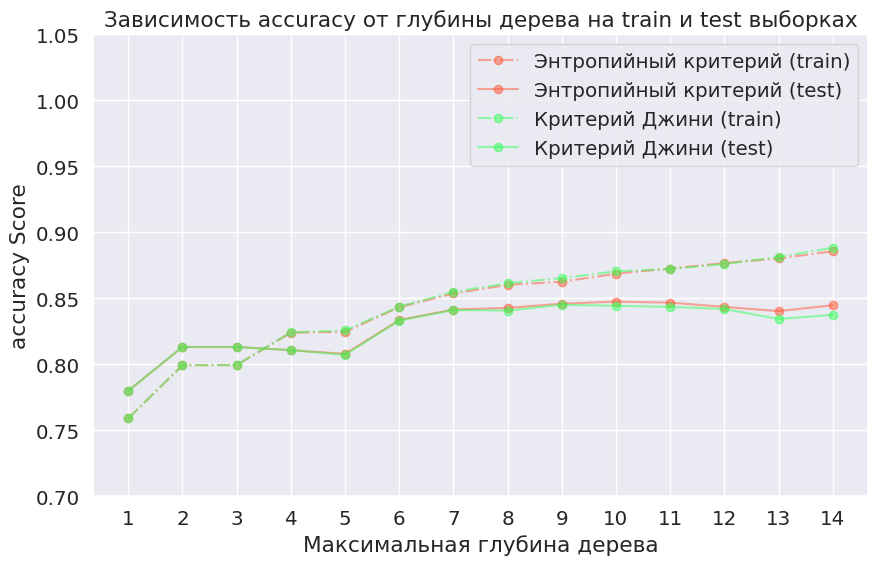

In [364]:
depths = np.arange(MIN_DEPTH, MAX_DEPTH)

models_history = {
    criterion[0]: {"depth": [], "accuracy_score_train": [], "accuracy_score_test": []}
    for criterion in criterion_names
}

min_samples_split = best_results["min_samples_split"]

for criterion_name, criterion in criterion_names:
    for depth in depths:
        print(f"depth:{depth}", end='\r')
        model = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_split=min_samples_split,
            criterion=criterion,
            size_of_averaged_threshold=size_of_averaged_threshold,
        )

        model.fit(X_adult_train, y_adult_train)

        model_acc_score_train = accuracy_score(
            y_adult_train, model.predict(X_adult_train)
        )
        model_acc_score_test = accuracy_score(y_adult_test, model.predict(X_adult_test))

        models_history[criterion_name]["depth"].append(depth)
        models_history[criterion_name]["accuracy_score_train"].append(
            model_acc_score_train
        )
        models_history[criterion_name]["accuracy_score_test"].append(
            model_acc_score_test
        )

plt.figure(figsize=(10, 6))

colors = [
    "#FF5733",  # Ярко-оранжевый
    "#33FF57",  # Ярко-зеленый
    "#3357FF",  # Ярко-синий
    "#FF33A8",  # Ярко-розовый
    "#FFD700",  # Золотой
    "#8A2BE2",  # Фиолетовый
    "#00CED1",  # Бирюзовый
    "#FF4500",  # Оранжево-красный
    "#ADFF2F",  # Зеленовато-желтый
    "#DC143C",  # Малиновый
    "#FF8C00",  # Темно-оранжевый
    "#7FFF00",  # Лаймово-зеленый
    "#1E90FF",  # Голубой
    "#FF1493",  # Ярко-розовый
    "#4B0082",  # Индиго
]

color_id = 0
for criterion_name, criterion in criterion_names:
    depths = models_history[criterion_name]["depth"]
    r2_train = models_history[criterion_name]["accuracy_score_train"]
    r2_test = models_history[criterion_name]["accuracy_score_test"]

    plt.plot(
        depths,
        r2_train,
        label=f"{criterion_name} (train)",
        linestyle="dashdot",
        color=colors[color_id],
        marker="o",
        alpha=0.5,
    )
    plt.plot(
        depths,
        r2_test,
        label=f"{criterion_name} (test)",
        linestyle="-",
        color=colors[color_id],
        marker="o",
        alpha=0.5,
    )

    color_id += 1

plt.title("Зависимость accuracy от глубины дерева на train и test выборках")
plt.xlabel("Максимальная глубина дерева")
plt.ylabel("accuracy Score")
plt.xticks(depths)
plt.ylim((0.7, 1.05))
plt.legend()
plt.grid(True)
plt.show()

Сделайте выводы. Почему графики получились такими? Как соотносятся оптимальные значения параметров на обучающей и на тестовой выборках?

Как видим, графики почти не зависит от типа критерия и типа данных. Это может свидетельствовать об очень однородной выборке. Как видим, оптимальные параметры дают максимум accuracy как для тестовых, так и для обучающих данных, что снова говорит о высокой однородности данных.

**Вывод.**

В работе нам удалось протестировать собственный класс классифицирующего решающего дерева. Было установлено, что критерий минорно влияют на финальный результат. Также в силу специфики данных, значение accuracy на test выборке почти совпадает с accuracy на train выборке.